In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
aqi = pd.read_csv('./output/air_quality_by_state.csv')
aqi

,state,year,days_with_aqi,max_aqi,90th_percentile_aqi,median_aqi,pct_good_days,pct_moderate_days,pct_unhealthy_for_sensitive_groups_days,pct_unhealthy_days,pct_very_unhealthy_days,pct_hazardous_days,pct_days_co,pct_days_no2,pct_days_ozone,pct_days_pm2.5,pct_days_pm10,pct_bad_days
0,Alabama,2000,201.090909,151.136364,95.818182,52.727273,0.460557,0.439145,0.086704,0.012601,0.000994,0.000000,0.005216,0.003041,0.387520,0.478625,0.125597,0.539443
1,Alabama,2001,219.000000,137.047619,80.523810,45.571429,0.595764,0.360452,0.036892,0.005848,0.001044,0.000000,0.008871,0.001003,0.444249,0.426518,0.119359,0.404236
2,Alabama,2002,238.818182,143.818182,79.636364,42.909091,0.640923,0.308082,0.044374,0.006334,0.000286,0.000000,0.007181,0.003711,0.509011,0.364713,0.115384,0.359077
3,Alabama,2003,234.000000,132.750000,73.500000,43.416667,0.631339,0.338255,0.028684,0.001721,0.000000,0.000000,0.004489,0.001829,0.486147,0.402407,0.105127,0.368661
4,Alabama,2004,236.800000,120.200000,69.800000,42.280000,0.684022,0.293580,0.021230,0.001057,0.000111,0.000000,0.001093,0.003191,0.523395,0.375292,0.097029,0.315978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,Wyoming,2018,329.666667,106.500000,58.611111,39.611111,0.789477,0.206487,0.003579,0.000457,0.000000,0.000000,0.000000,0.007854,0.779945,0.047889,0.164312,0.210523
1191,Wyoming,2019,343.888889,98.000000,51.944444,38.833333,0.871004,0.125178,0.003362,0.000457,0.000000,0.000000,0.000000,0.004811,0.818655,0.018977,0.157558,0.128996
1192,Wyoming,2020,338.352941,131.705882,50.352941,34.882353,0.876343,0.113637,0.007989,0.001768,0.000263,0.000000,0.000000,0.061075,0.654444,0.079556,0.204924,0.123657
1193,Wyoming,2021,349.941176,128.823529,65.235294,36.294118,0.783710,0.199038,0.016930,0.000161,0.000000,0.000161,0.000323,0.061565,0.693599,0.089626,0.154887,0.216290


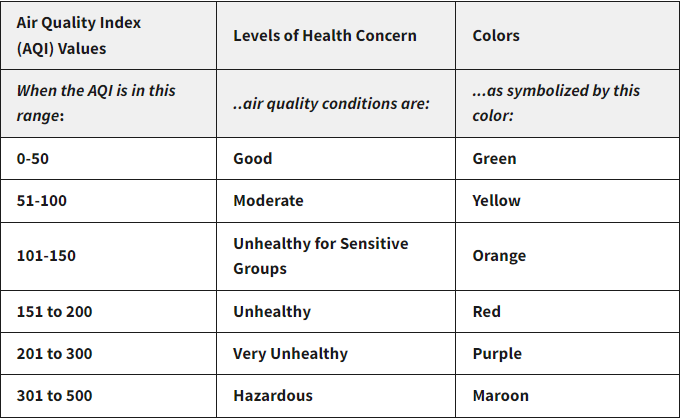

In [47]:
quality_cols = [
    'pct_good_days', 
    'pct_moderate_days',
    'pct_unhealthy_for_sensitive_groups_days',
    'pct_unhealthy_days',
    'pct_very_unhealthy_days',
    'pct_hazardous_days'
]

In [51]:
aqi['pct_good_days'].mean()

0.7738192045947713

In [55]:
for col in quality_cols:
    avg_pct = aqi[col].mean()
    print(f"Average {col}: {avg_pct:.2f}")

Average pct_good_days: 0.77
Average pct_moderate_days: 0.20
Average pct_unhealthy_for_sensitive_groups_days: 0.02
Average pct_unhealthy_days: 0.00
Average pct_very_unhealthy_days: 0.00
Average pct_hazardous_days: 0.00


In [56]:
# Group the DataFrame by state and calculate the average max_aqi for each group
avg_max_aqi = aqi.groupby('state')['max_aqi'].mean()

# Sort the DataFrame by average max_aqi in descending order and print the top three rows
highest_avg_max_aqi = avg_max_aqi.sort_values(ascending=False).head(3)
print("States with highest average max_aqi:")
print(highest_avg_max_aqi)

print(' ')

# Sort the DataFrame by average max_aqi in ascending order and print the bottom three rows
lowest_avg_max_aqi = avg_max_aqi.sort_values().head(3)
print("States with lowest average max_aqi:")
print(lowest_avg_max_aqi)

States with highest average max_aqi:
state
District Of Columbia    165.521739
Connecticut             164.516304
California              161.149189
Name: max_aqi, dtype: float64
 
States with lowest average max_aqi:
state
Virgin Islands    80.825758
Nebraska          87.812613
Hawaii            90.188406
Name: max_aqi, dtype: float64


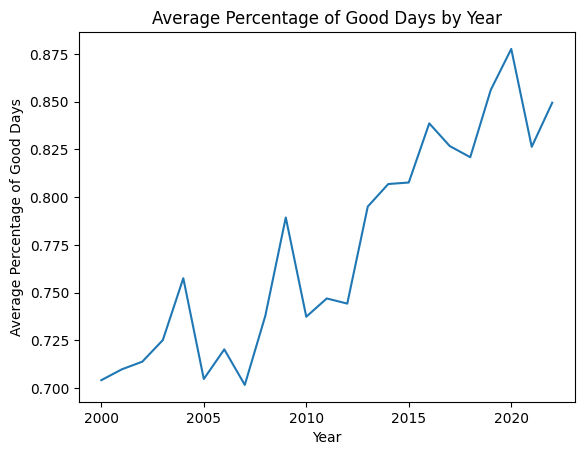

In [58]:
# Group the data by year and calculate the mean of the good_days column for each year
mean_good_days_by_year = aqi.groupby('year')['pct_good_days'].mean()

# Create a line plot
plt.plot(mean_good_days_by_year.index, mean_good_days_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Percentage of Good Days')
plt.title('Average Percentage of Good Days by Year')
plt.show();

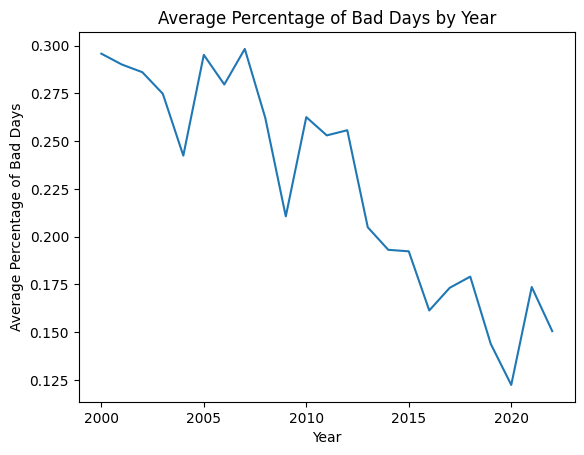

In [59]:
# Group the data by year and calculate the mean of the good_days column for each year
mean_bad_days_by_year = aqi.groupby('year')['pct_bad_days'].mean()

# Create a line plot
plt.plot(mean_bad_days_by_year.index, mean_bad_days_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Percentage of Bad Days')
plt.title('Average Percentage of Bad Days by Year')
plt.show();

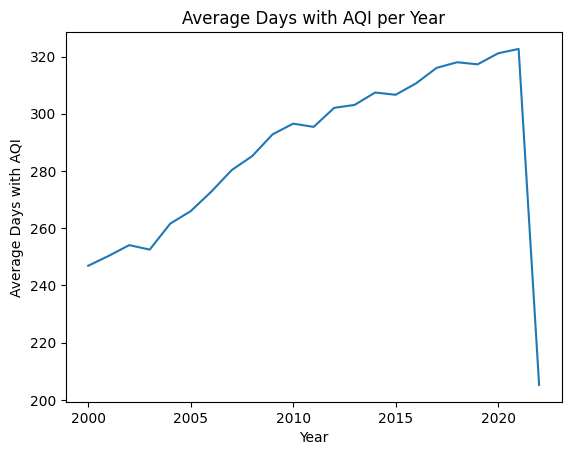

In [60]:
avg_days_with_aqi = aqi.groupby('year')['days_with_aqi'].mean()

# create a line plot of the average days_with_aqi per year
avg_days_with_aqi.plot(kind='line', x='year', y='days_with_aqi')
plt.title('Average Days with AQI per Year')
plt.xlabel('Year')
plt.ylabel('Average Days with AQI')
plt.show()

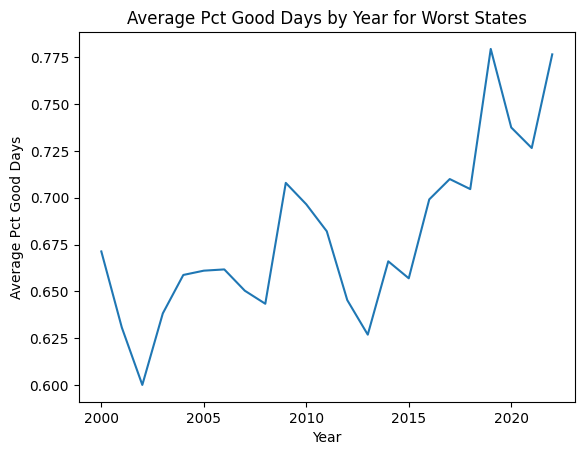

In [62]:
worst_states = ['District of Columbia', 'Connecticut', 'California']

# Filter the dataframe to only include the worst states
worst_states_df = aqi[aqi['state'].isin(worst_states)]

# Group by year and calculate the mean pct_good_days for each year
pct_good_days_by_year = worst_states_df.groupby('year')['pct_good_days'].mean()

# Plot the line graph
plt.plot(pct_good_days_by_year.index, pct_good_days_by_year.values)
plt.title('Average Pct Good Days by Year for Worst States')
plt.xlabel('Year')
plt.ylabel('Average Pct Good Days')
plt.show;

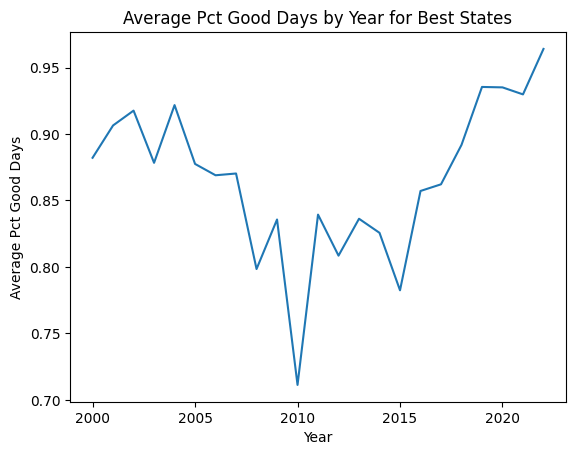

In [63]:
best_states = ['Virgin Islands', 'Nebraska', 'Hawaii']

# Filter the dataframe to only include the worst states
best_states_df = aqi[aqi['state'].isin(best_states)]

# Group by year and calculate the mean pct_good_days for each year
pct_good_days_by_year = best_states_df.groupby('year')['pct_good_days'].mean()

# Plot the line graph
plt.plot(pct_good_days_by_year.index, pct_good_days_by_year.values)
plt.title('Average Pct Good Days by Year for Best States')
plt.xlabel('Year')
plt.ylabel('Average Pct Good Days')
plt.show;

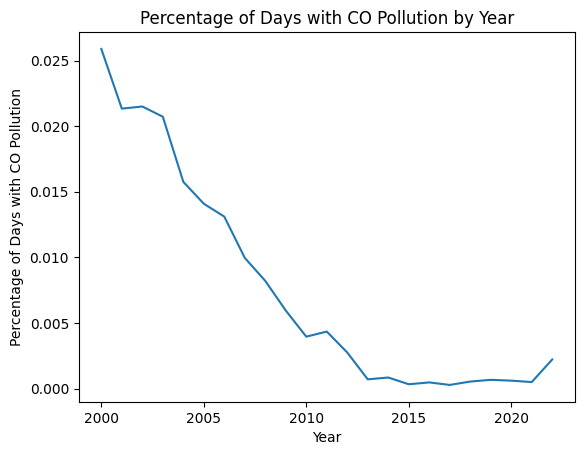

In [65]:
plt.plot(aqi.groupby('year')['pct_days_co'].mean())
plt.title('Percentage of Days with CO Pollution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with CO Pollution')
plt.show();

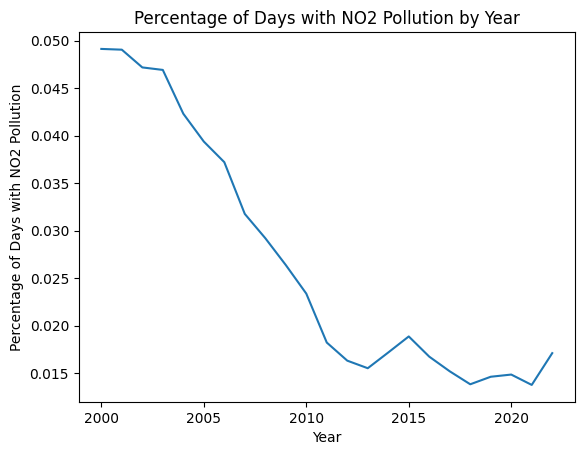

In [66]:
plt.plot(aqi.groupby('year')['pct_days_no2'].mean())
plt.title('Percentage of Days with NO2 Pollution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with NO2 Pollution')
plt.show();

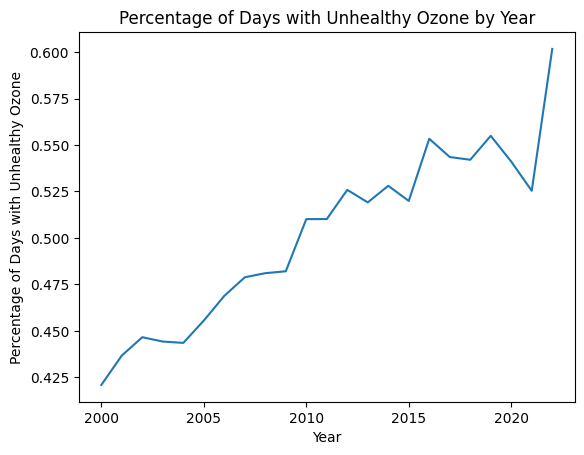

In [67]:
plt.plot(aqi.groupby('year')['pct_days_ozone'].mean())
plt.title('Percentage of Days with Unhealthy Ozone by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with Unhealthy Ozone')
plt.show();

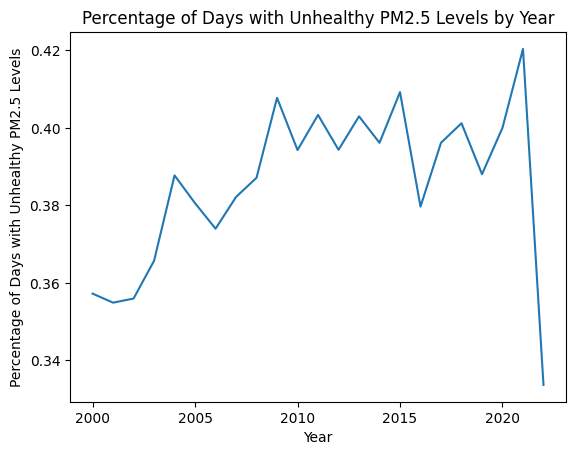

In [68]:
plt.plot(aqi.groupby('year')['pct_days_pm2.5'].mean())
plt.title('Percentage of Days with Unhealthy PM2.5 Levels by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with Unhealthy PM2.5 Levels')
plt.show();

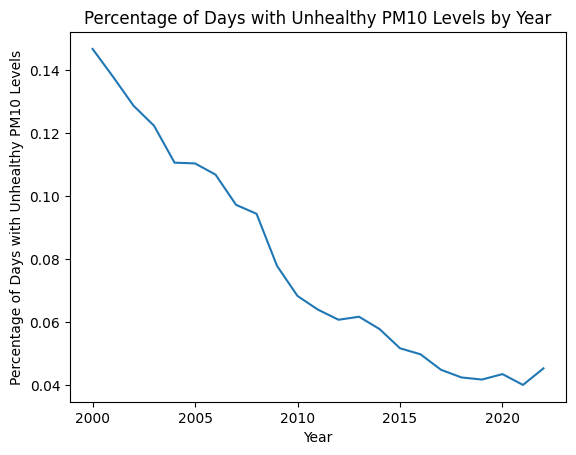

In [69]:
plt.plot(aqi.groupby('year')['pct_days_pm10'].mean())
plt.title('Percentage of Days with Unhealthy PM10 Levels by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with Unhealthy PM10 Levels')
plt.show();